
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

W0714 00:42:45.590103  5972 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 00:42:45.611104  5972 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 00:42:45.618103  5972 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

# opt='adam'
# opt='sgd'
opt='rmsprop'

batch_size=128
epochs = 20

In [6]:
def calc(opt, batch_size, epochs):
    model = Sequential()

    #   第二步：構建網絡層
 
    model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    # 第三步：編譯,
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    #  第四步：資料分割
    # 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
    (X_train, y_train), (X_test, y_test) = mnist.load_data() 

    # 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
    Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
    Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)
    
    # 第五步：訓練, 修正 model 參數
    #Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
    import tensorflow as tf
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


    history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
    
    #    第六步：輸出 
    print ( " test set " )
    scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
    print ( "" )
    #print ( " The test loss is %f " % scores)
    print ( " The test loss is %f ", scores)
    result = model.predict(X_test,batch_size=200,verbose= 0)

    result_max = numpy.argmax(result, axis = 1 )
    test_max = numpy.argmax(Y_test, axis = 1 )

    result_bool = numpy.equal(result_max, test_max)
    true_num = numpy.sum(result_bool)
    print ( "" )
    print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))
    
    import matplotlib.pyplot as plt

    %matplotlib inline

    # history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [7]:
opt='adam'
# opt='sgd'
# opt='rmsprop'

batch_size=128
epochs = 10

W0714 00:42:46.060261  5972 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 00:42:46.093315  5972 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0714 00:42:46.105334  5972 deprecation.py:323] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 00:42:48.868181  5972 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 25s - loss: 2.8896 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 2/10
 - 24s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 3/10
 - 22s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 4/10
 - 22s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 5/10
 - 22s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 6/10
 - 22s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 7/10
 - 23s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 8/10
 - 21s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 9/10
 - 22s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 10/10
 - 22s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
 test set 

 The test loss is %f  [2.8918549060821532, 0.8196000051498413]

 The accuracy of the model is 0.0

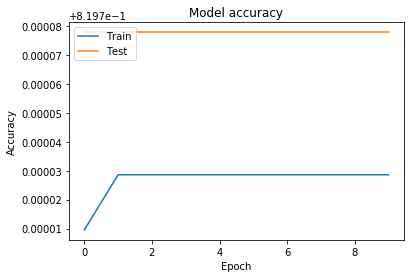

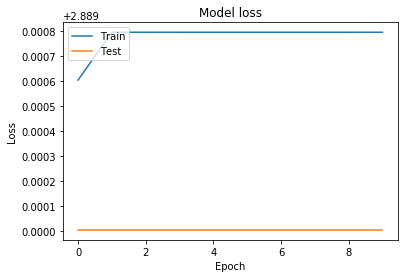

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 6s - loss: 2.8768 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 2/10
 - 6s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 3/10
 - 6s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 4/10
 - 5s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 5/10
 - 5s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 6/10
 - 6s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 7/10
 - 5s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 8/10
 - 5s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 9/10
 - 6s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
Epoch 10/10
 - 6s - loss: 2.8803 - acc: 0.8203 - val_loss: 2.8742 - val_acc: 0.8207
 test set 

 The test loss is %f  [2.8822367763519288, 0.820200001001358]

 The accuracy of the model is 0.101000 


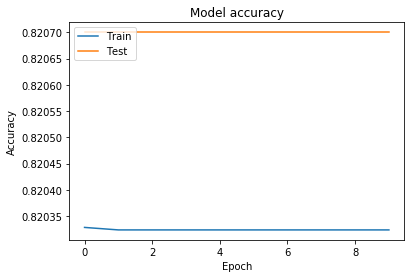

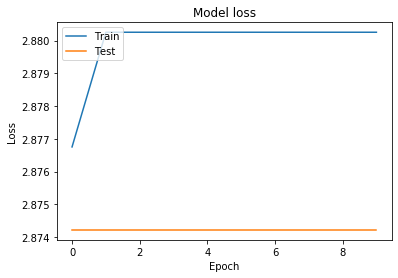

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 4s - loss: 2.8391 - acc: 0.8228 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 2/10
 - 3s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 3/10
 - 3s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 4/10
 - 3s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 5/10
 - 3s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 6/10
 - 3s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 7/10
 - 3s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 8/10
 - 4s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 9/10
 - 4s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 10/10
 - 4s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
 test set 

 The test loss is %f  [2.8421611833572387, 0.8227000069618225]

 The accuracy of the model is 0.113500 


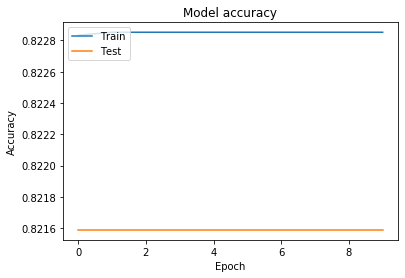

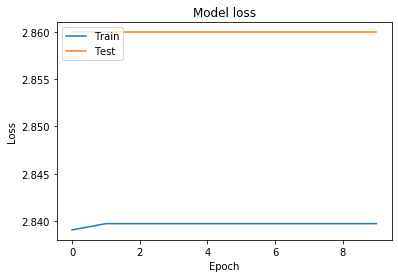

In [8]:
# HW 1
opt='adam'
batch_sizes = [16,64,128]
epochs =10
for b in batch_sizes:
    calc(opt, b,epochs)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
 - 30s - loss: 2.8971 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 2/5
 - 31s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 3/5
 - 51s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 4/5
 - 39s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 5/5
 - 41s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
 test set 

 The test loss is %f  [2.893778557777405, 0.8194800007343293]

 The accuracy of the model is 0.097400 


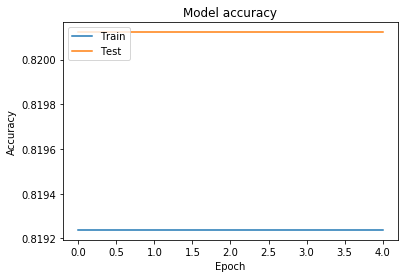

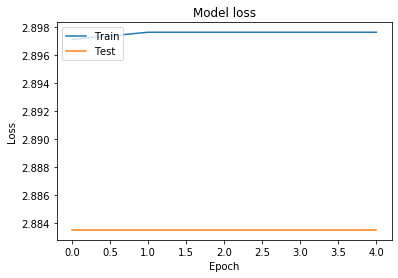

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 34s - loss: 2.8862 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 2/10
 - 31s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 3/10
 - 28s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 4/10
 - 28s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 5/10
 - 29s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 6/10
 - 28s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 7/10
 - 28s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 8/10
 - 28s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 9/10
 - 30s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
Epoch 10/10
 - 28s - loss: 2.8870 - acc: 0.8199 - val_loss: 2.8965 - val_acc: 0.8193
 test set 

 The test loss is %f  [2.8989082527160646, 0.8191600251197815]

 The accuracy of the model is 0.0

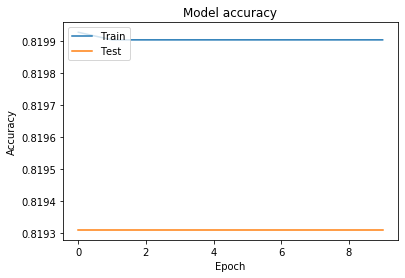

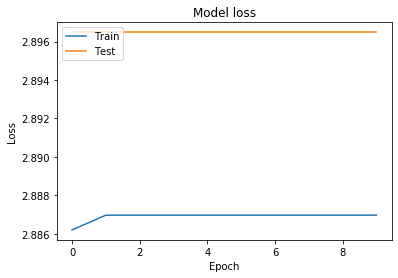

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 30s - loss: 2.8747 - acc: 0.8207 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 2/20
 - 29s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 3/20
 - 26s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 4/20
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 5/20
 - 25s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 6/20
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 7/20
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 8/20
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 9/20
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 10/20
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 11/20
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 12/20
 - 24s - los

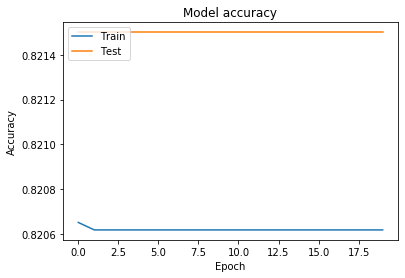

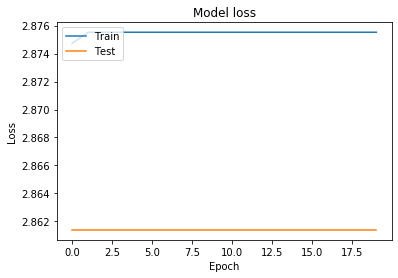

In [9]:
# HW 1-2
opt='adam'
batch_size=12
epochsarr = [5,10,20]

for e in epochsarr:
    calc(opt, batch_size,e)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 25s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 2/10
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 3/10
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 4/10
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 5/10
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 6/10
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 7/10
 - 25s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 8/10
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 9/10
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 10/10
 - 24s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
 test set 

 The test loss is %f  [2.8764658689498903, 0.8205600106716155]

 The accuracy of the model is 0.1

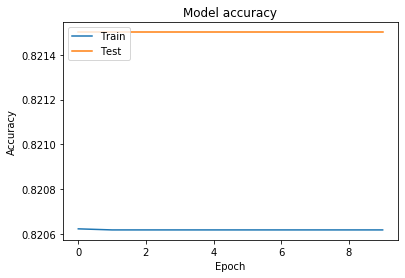

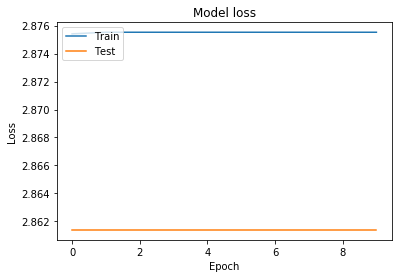

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 19s - loss: 2.8890 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 2/10
 - 18s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 3/10
 - 18s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 4/10
 - 18s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 5/10
 - 18s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 6/10
 - 18s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 7/10
 - 18s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 8/10
 - 18s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 9/10
 - 18s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 10/10
 - 18s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
 test set 

 The test loss is %f  [2.8751834774017335, 0.8206400120258331]

 The accuracy of the model is 0.1

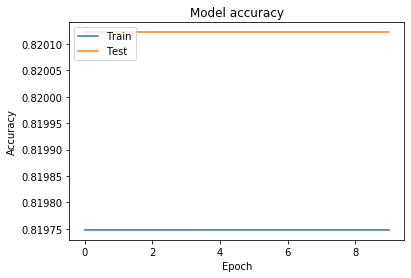

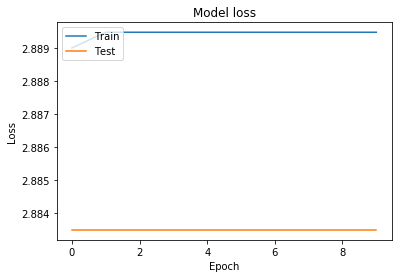

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 23s - loss: 2.8398 - acc: 0.8228 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 2/10
 - 22s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 3/10
 - 22s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 4/10
 - 22s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 5/10
 - 22s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 6/10
 - 22s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 7/10
 - 22s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 8/10
 - 22s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 9/10
 - 22s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 10/10
 - 22s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
 test set 

 The test loss is %f  [2.8421611833572387, 0.8227000069618225]

 The accuracy of the model is 0.1

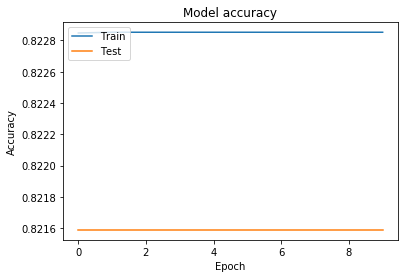

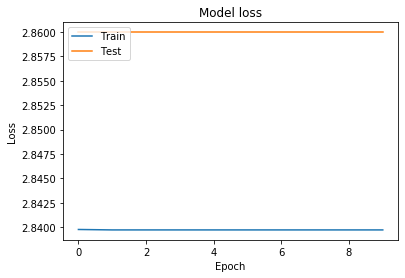

In [10]:
# HW2
opts = ['adam', 'sgd','rmsprop']

for opt in opts:
    calc(opt, batch_size,epochs)